In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

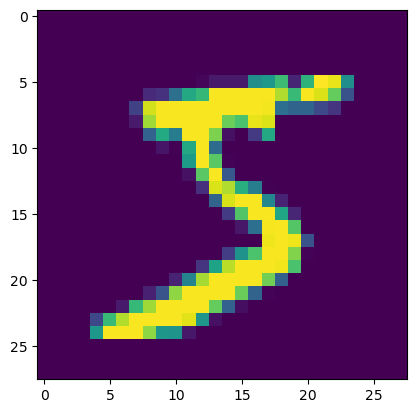

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [13]:
28*28

784

In [15]:
784/2

392.0

In [16]:
encoder= Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [17]:
decoder= Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))

decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [18]:
autoencoder= Sequential([encoder,decoder])

In [26]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer=SGD(learning_rate=1.5),
                   metrics=['accuracy'])

In [27]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=[X_test,X_test])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2319 - accuracy: 0.1055 - val_loss: 0.1946 - val_accuracy: 0.1494
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1794 - accuracy: 0.1749 - val_loss: 0.1640 - val_accuracy: 0.1954
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1596 - accuracy: 0.2050 - val_loss: 0.1500 - val_accuracy: 0.2159
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1478 - accuracy: 0.2187 - val_loss: 0.1490 - val_accuracy: 0.2242
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1388 - accuracy: 0.2294 - val_loss: 0.1420 - val_accuracy: 0.2341
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1332 - accuracy: 0.2354 - val_loss: 0.1321 - val_accuracy: 0.2310
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1299 - accuracy: 0.2397 - val_loss: 0.1351 - val_ac

In [28]:
passed_images= autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 125ms/step


Original Image


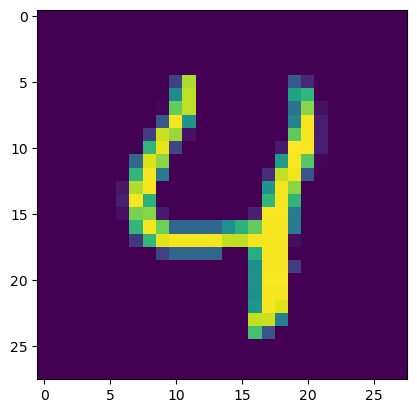

Attempted recponstruction after autoencoder


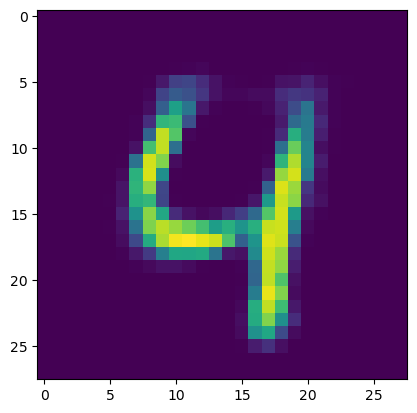

In [32]:
n=4

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted recponstruction after autoencoder")
plt.imshow(passed_images[n])

In [33]:
from tensorflow.keras.layers import GaussianNoise

In [34]:
sample= GaussianNoise(0.2)

In [35]:
noisey= sample(X_test[:10],training=True)

Original version


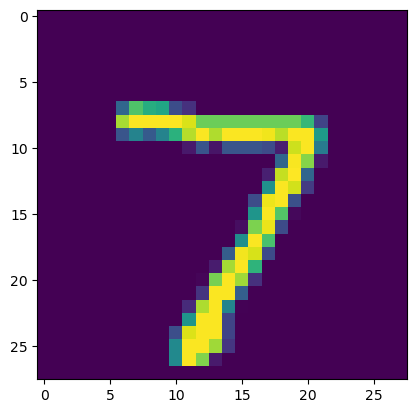

Noise Version


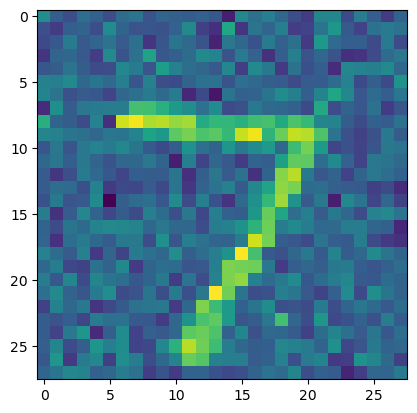

In [36]:
n=0

print('Original version')
plt.imshow(X_test[n])
plt.show()
print('Noise Version')
plt.imshow(noisey[n])

In [37]:
import tensorflow as tf

In [38]:
tf.random.set_seed(101)
np.random.seed(101)

encoder= Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [39]:
decoder= Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))

decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

decoder.add(Reshape([28,28]))

In [40]:
noise_remover= Sequential([encoder,decoder])

In [41]:
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
noise_remover.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 13ms/step - loss: 0.1732 - accuracy: 0.1769
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1314 - accuracy: 0.2283
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1244 - accuracy: 0.2404
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1185 - accuracy: 0.2486
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1143 - accuracy: 0.2565
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1117 - accuracy: 0.2624
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1096 - accuracy: 0.2663
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1076 - accuracy: 0.2709
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1058 - accuracy: 0.2749
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [48]:
ten_noisey_images= sample(X_test[:10],training=True)

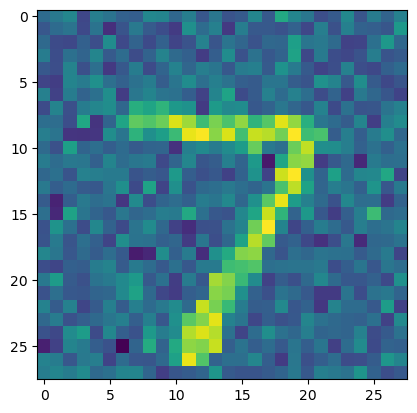

In [50]:
plt.imshow(ten_noisey_images[0])

In [44]:
denoised= noise_remover(ten_noisey_images)

Original Image


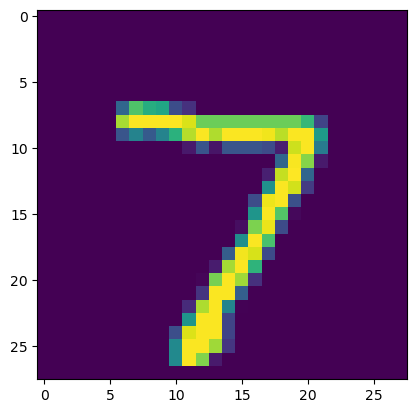

Noise Image


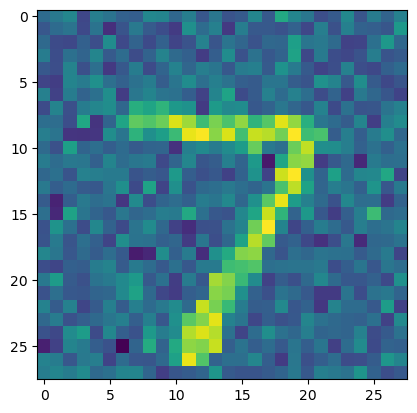

Noise remover from Autoencoder


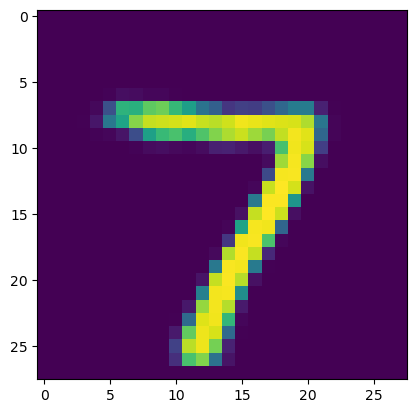

In [51]:
n=0

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print('Noise Image')
plt.imshow(ten_noisey_images[n])
plt.show()
print('Noise remover from Autoencoder')
plt.imshow(denoised[n])
plt.show()